In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


NO NULL values found in the dataset  
The dataset does not contain any categorical columns  

In [4]:
age_demo = df.groupby('age')['sex'].value_counts()
print(age_demo)



age  sex
29   1       4
34   0       3
     1       3
35   1      11
     0       4
            ..
70   1      14
71   0      11
74   0       3
76   0       3
77   1       3
Name: count, Length: 73, dtype: int64


C:\Users\archit vaishnav\AppData\Local\Temp\ipykernel_18356\3161313881.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_demo = df.groupby(['age_range', 'sex']).size().reset_index(name='count')


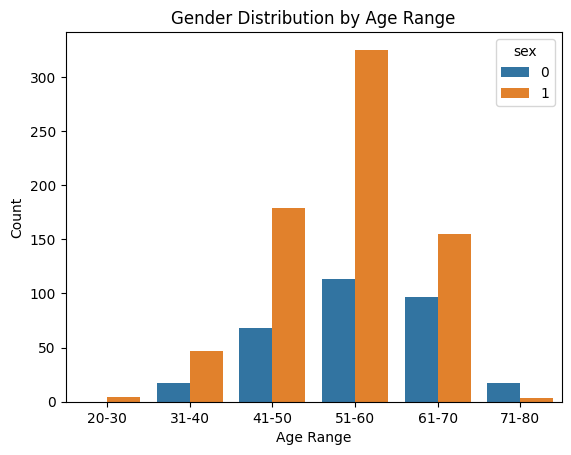

In [5]:
import seaborn as sns
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
age_demo = df.groupby(['age_range', 'sex']).size().reset_index(name='count')

sns.barplot(data=age_demo, x='age_range', y='count', hue='sex')
plt.title('Gender Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

**Majority of the population are between the age: 51-60**  
**Followed by: 61-70 and 41-50**

**Now, Checking other factors using same age groups**

In [6]:
df_copy = df.copy() # creating a copy of original dataframe and performing all operations on that

**Our task is to predict maximum heart rate based on the age. (thalach)**  
**For this we will train a LinearRegression Model**

Root Mean Squared Error (RMSE): 21.452323617466238
R² Score: 0.1516389480324951


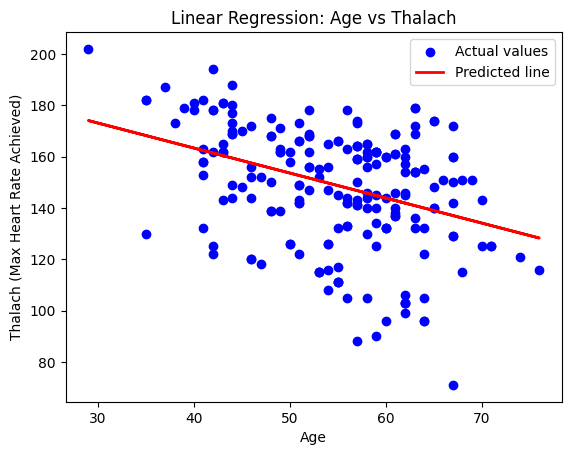

In [7]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Selecting features and target
X = df[['age']] 
y = df['thalach']

# Splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('Age')
plt.ylabel('Thalach (Max Heart Rate Achieved)')
plt.title('Linear Regression: Age vs Thalach')
plt.legend()
plt.show()

## The initial LinearRegression model shows that 'age' alone is not the only factor that infulence 'thalach'  
**`R2 score` is `0.1516389480324951` which means that the Linear Model is able to explain only `~15%` of the variance.**  

# Logistic Regression

## A model to predict whether a patient has heart disease (target).  
**X: `age`, `sex`, `cp`, `trestbps`, `chol`**  
**y: The `target`  column:  `0: Patient doesn't have heart disease, 1: Patient has heart disease`**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,precision_score, recall_score,confusion_matrix

# splitting the dataset on the columns as mentioned above
X = df[['age','sex','cp','trestbps','chol']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logi_reg = LogisticRegression()
logi_reg.fit(X_train,y_train)
y_pred = logi_reg.predict(X_test)
y_pred_proba = logi_reg.predict_proba(X_test)[:, 1]

## Evaluating the Logistic Regression Model  

In [9]:
from sklearn.metrics import accuracy_score,classification_report

# accuracy score
accuracy = accuracy_score(y_test,y_pred)
#precision score
precision = precision_score(y_test,y_pred)
# recall score
recall = recall_score(y_test,y_pred)
# f1 score
f1 = f1_score(y_test,y_pred)
# roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred_proba)

print("Evaluation: ")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC_AUC Score: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Evaluation: 
Accuracy: 0.7902
Precision: 0.7941
Recall: 0.7864
F1 Score: 0.7902
ROC_AUC Score: 0.8615

Confusion Matrix:
 [[81 21]
 [22 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       102
           1       0.79      0.79      0.79       103

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



## F1 Score:   
A metric that combines precision and recall into a single value, calculated as the harmonic mean of the two.  
As a result a model will have a high F1 score if it's precision and recall are high.  

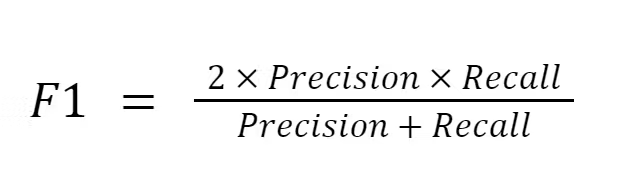   



## ROC Curve 
ROC stands for Receiver Operating Characterstic curve, it plots ***true positive rate*** vs ***false positive rate***.  
***true positive rate*** is an another name for recall, The FPR is the ratio of negative instances that
 are incorrectly classified as positive. It is equal to ***one minus the true negative rate***, 
which is the ***ratio of negative instances that are correctly classified as negative***. The
 TNR is also called ***specificity***. Hence the ROC curve ***plots sensitivity (recall) versus
 1 – specificity***.  


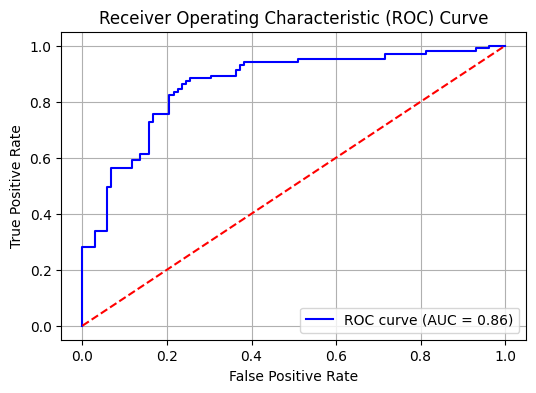

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

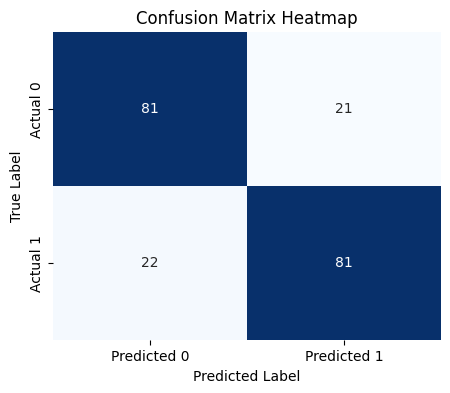

In [11]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Full featured model

In [15]:
# training a logistic regression model on all the features and then comparing the accuracy with the previous model
df = df.drop(['age_range'],axis=1)

In [18]:
X_new = df.drop(['target'],axis=1)
y_new = df['target']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
logi_reg_new = LogisticRegression(max_iter=1000)
logi_reg_new.fit(X_train,y_train)
y_pred = logi_reg_new.predict(X_test)
y_pred_proba = logi_reg_new.predict_proba(X_test)[:, 1]

In [20]:
# accuracy score
accuracy_new = accuracy_score(y_test,y_pred)
#precision score
precision_new = precision_score(y_test,y_pred)
# recall score
recall_new = recall_score(y_test,y_pred)
# f1 score
f1_new = f1_score(y_test,y_pred)
# roc_auc_score
roc_auc_new = roc_auc_score(y_test,y_pred_proba)

print("Evaluation: ")
print(f"Accuracy: {accuracy_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}")
print(f"F1 Score: {f1_new:.4f}")
print(f"ROC_AUC Score: {roc_auc_new:.4f}")

cm_new = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm_new)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Evaluation: 
Accuracy: 0.7951
Precision: 0.7563
Recall: 0.8738
F1 Score: 0.8108
ROC_AUC Score: 0.8768

Confusion Matrix:
 [[73 29]
 [13 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## Thus accuracy is ***INCREASED*** on training the model on full features.  

- Our previous logistic model gave F1 score of `0.7902`
- Our new logistic model gave F1 score of `0.8108`
- Old ROC score was `0.8615`
- New ROC score is `0.8768`

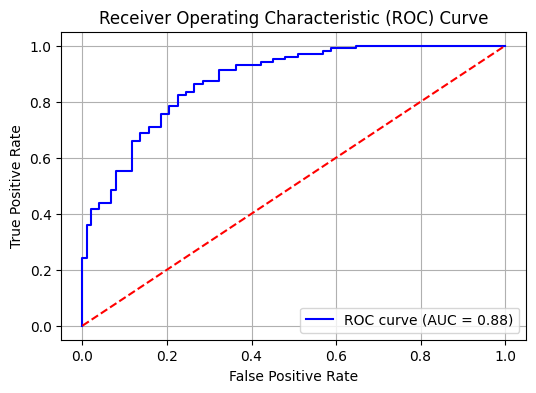

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

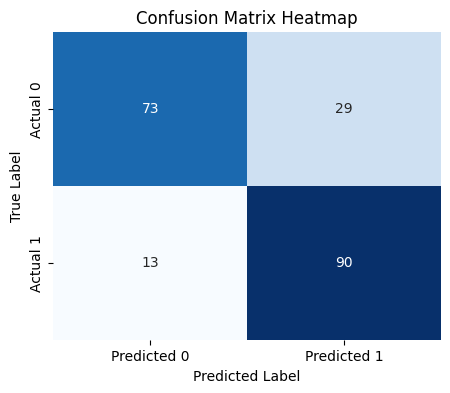

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Conclusion  

## Key insights from the model and it's performance:  
1. Major patients from the dataset were in the age-range of `51-60`.
2. When a Simple Linear regression model was trained to predict the `thalach` from `age` it showed `R2 ~15%` which further suggested that `thalach` not only dependent on `age` but it also depend on other features as well.
3. Then a Logistic regression model was trained using some features from the dataset and the metrics is as below:

   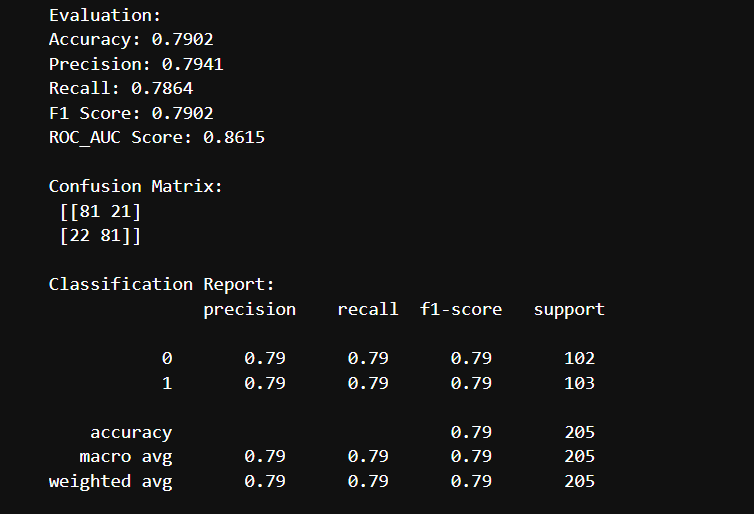
   
5. The `ROC AUC score: 0.86` indicated pretty good results with limited features.
   The ROC graph is as below:


   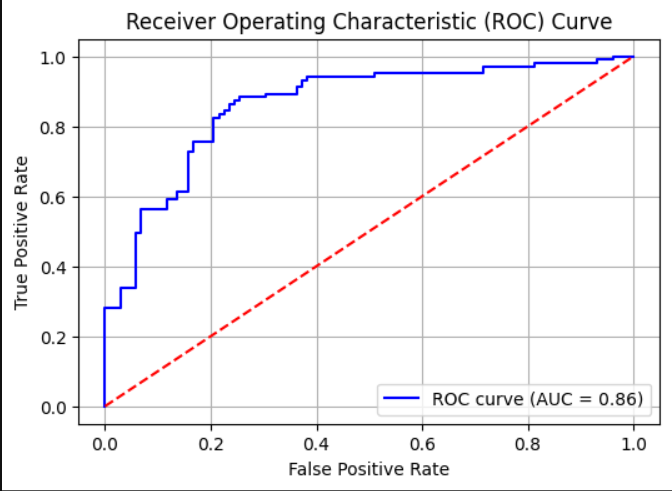
6. The confusion matrix for the Logistic Regression model:

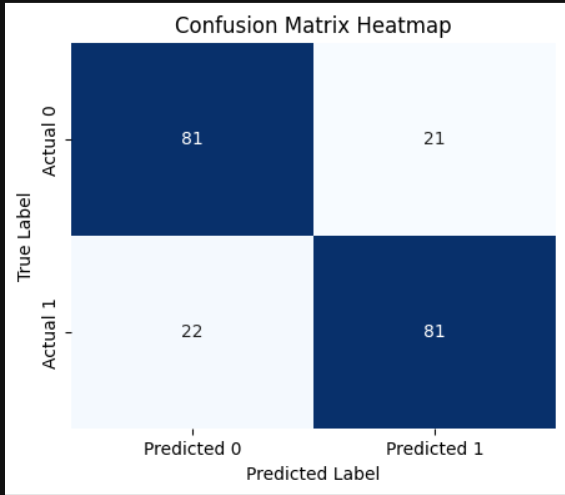   

# Full featured model  

1. Full featured model gave better accuracy and F1 score than previous one which suggests that the target variable has considerable relations with all the features.
2. F1 score was increased to `0.8108`
3. ROC score was increased to `0.8768`